In [1]:
import pandas as pd
import warnings 
import numpy as np

warnings.filterwarnings('ignore')

df = pd.read_csv('../price.csv',index_col=['stock_id','date'],parse_dates=['date'])
df = df.rename(columns={
    '開盤價':'open',
    '最高價':'high',
    '最低價':'low',
    '收盤價':'close',
    '成交金額':'volume'
})
df = df[['open','high','low','close','volume']]
df = df.loc[df['volume']>0]
df = df.apply(pd.to_numeric,errors='coerce')
df = df.loc['2330']
df

,open,high,low,close,volume
date,,,,,
2007-01-02,67.8,68.0,67.3,67.7,1768131919
2007-01-03,67.8,68.7,67.5,68.0,2875024398
2007-01-04,67.7,68.1,67.6,67.7,1514454033
2007-01-05,67.5,67.7,66.5,66.9,2048997239
2007-01-08,66.1,66.5,65.7,65.8,1595029837
...,...,...,...,...,...
2022-06-20,500.0,502.0,495.0,498.0,18267359790
2022-06-21,501.0,505.0,499.0,505.0,17298234720
2022-06-22,501.0,503.0,494.5,494.5,16630857096


10 10 124.45000000000005
10 26 199.75
10 27 214.05
10 35 216.5
10 36 232.79999999999995
10 42 243.79999999999995
10 44 247.44999999999993
10 48 249.84999999999997
10 53 251.7
10 78 263.75
10 79 264.15
11 78 268.34999999999997
11 79 268.75
13 78 270.45
13 79 270.84999999999997
16 42 275.99999999999994
16 53 288.29999999999995
16 78 289.54999999999995
18 42 301.9
25 42 308.04999999999995
28 42 308.34999999999997
64 42 312.9
64 78 316.9


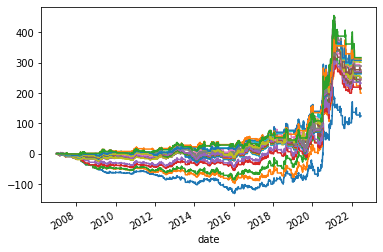

In [7]:
highest_earning = 0

for i in range(10,90,1):
    for j in range(10,90,1):
        df['hold'] = np.nan
        condition_buy = (df['close'].rolling(i).max() == df['close'])
        condition_sell = df['close']<df['close'].rolling(j).mean()

        df.loc[condition_buy,'hold'] = 1
        df.loc[condition_sell,'hold'] = 0

        df['hold'].ffill(inplace=True)
        df['hold'] = df['hold'].fillna(0)

        df['earn'] = 0

        df['earn'].loc[df['hold']==1] = df['open'].shift(-2)-df['open'].shift(-1)

        
        if df['earn'].cumsum().dropna().iloc[-1]>highest_earning:
            print(i,j,df['earn'].cumsum().dropna().iloc[-1])
            highest_earning = df['earn'].cumsum().dropna().iloc[-1]
            df['earn'].cumsum().plot()

# nan
# 1
# 1
# 1
# 0
# 0
# 1
# 1
# 0


316.9


Start date,2007-01-02
End date,2022-06-24
Total months,181
,Backtest
Annual return,8.192%
Cumulative returns,229.171%
Annual volatility,16.836%
Sharpe ratio,0.55
Calmar ratio,0.36
Stability,0.79
Max drawdown,-22.592%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,22.59,2013-02-19,2014-02-18,2017-06-05,1120
1,20.04,2021-02-05,2022-02-23,NaT,NaN
2,18.74,2009-05-26,2010-11-22,2012-03-26,740
3,16.55,2018-09-04,2019-03-07,2019-10-14,290
4,10.97,2008-03-20,2008-03-27,2009-03-17,259


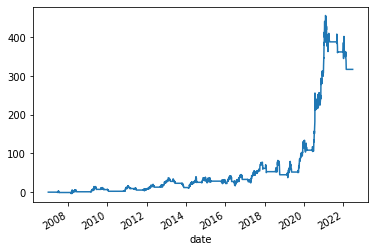

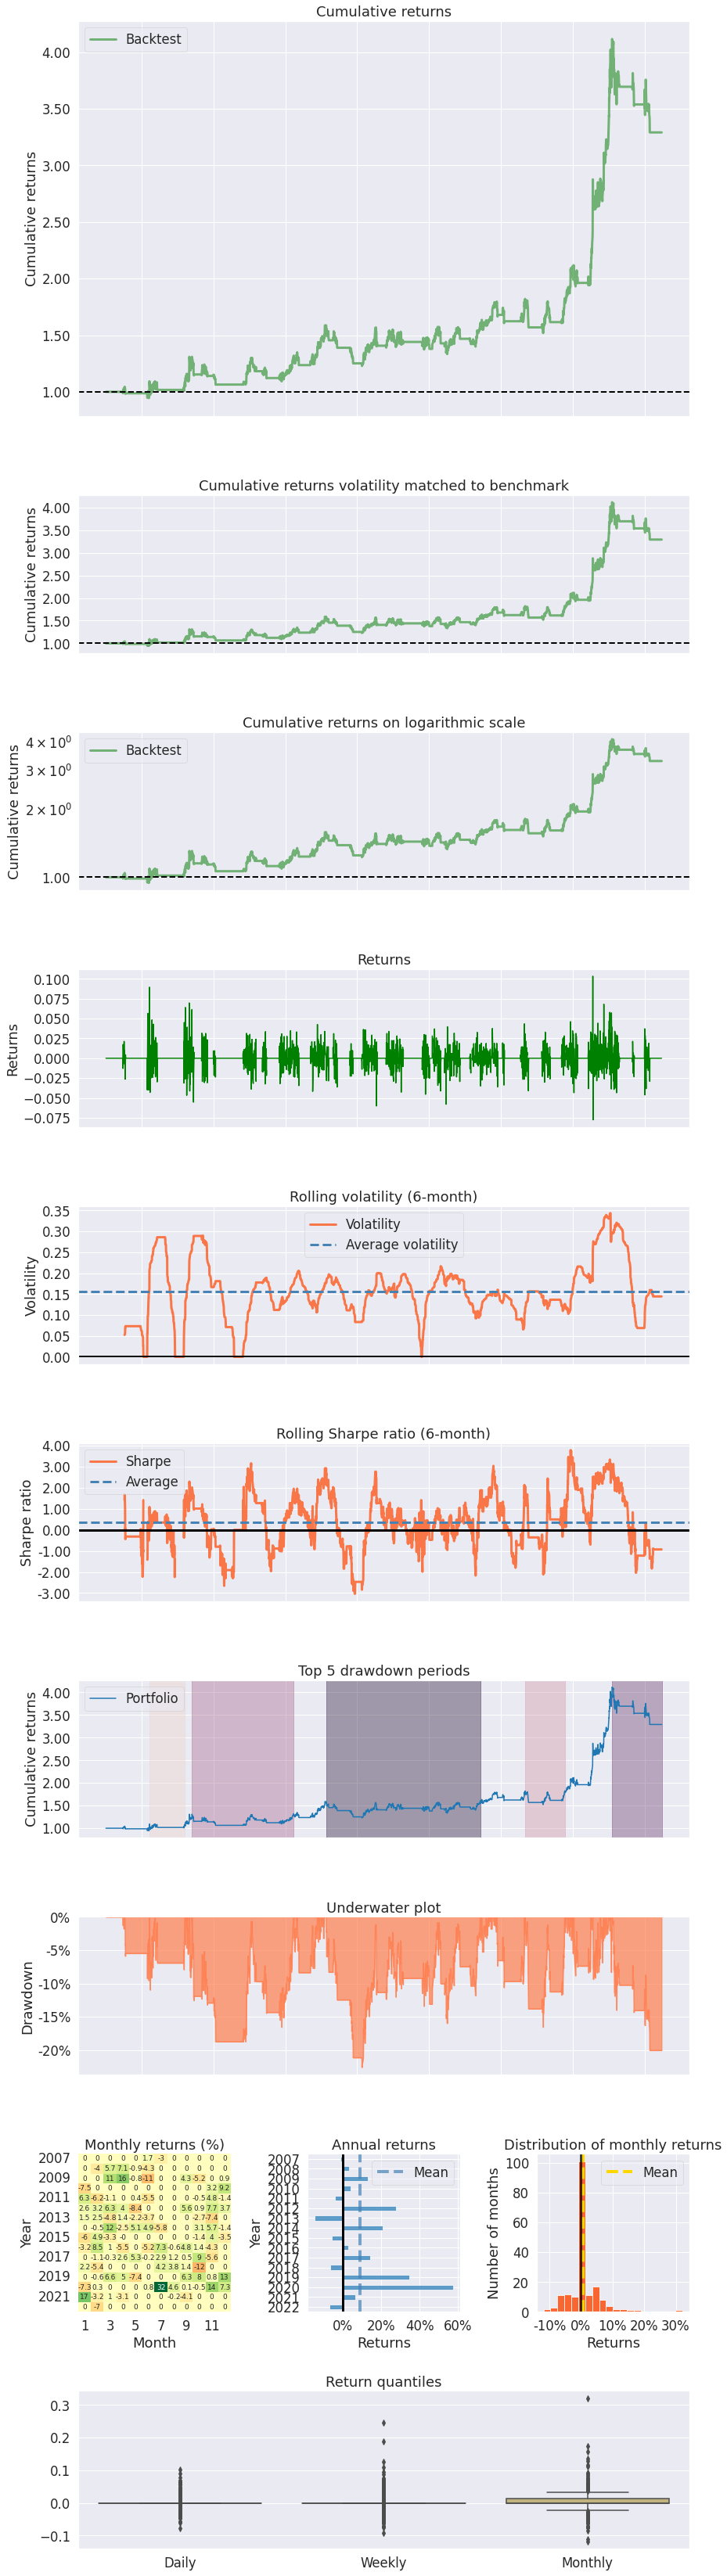

In [10]:
df['hold'] = np.nan
condition_buy = (df['close'].rolling(64).max() == df['close'])
condition_sell = df['close']<df['close'].rolling(78).mean()

df.loc[condition_buy,'hold'] = 1
df.loc[condition_sell,'hold'] = 0

df['hold'].ffill(inplace=True)
df['hold'] = df['hold'].fillna(0)

df['earn'] = 0

df['earn'].loc[df['hold']==1] = df['open'].shift(-2)-df['open'].shift(-1)

print(df['earn'].cumsum().dropna().iloc[-1])
df['earn'].cumsum().plot()

import pyfolio as pf

pf.create_returns_tear_sheet(df['earn']/df['open'].shift(-1))